# Exploratory Data Analysis

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/DnYAlv/Scholarship-ML-Final-Project/main/Dataset/train.csv", index_col = "id")
df = df.drop("Unnamed: 0", axis=1)
df = df.sort_values('id', ascending=True)

## Checking data, null, and duplicated values

In [34]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,3,5,3,5,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,2,3,5,4,5,5,5,5,3,5,5,26,39.0,satisfied
3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,4,5,5,5,3,3,3,3,4,3,5,0,0.0,satisfied
4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,4,4,5,5,5,5,5,3,5,4,0,0.0,satisfied
5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,4,5,4,3,3,4,3,3,3,5,0,1.0,satisfied


In [35]:
df.shape

(103904, 23)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [37]:
df.nunique().sort_values(ascending=False)

Flight Distance                      3802
Arrival Delay in Minutes              455
Departure Delay in Minutes            446
Age                                    75
Online boarding                         6
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Baggage handling                        5
Class                                   3
Customer Type                           2
satisfaction                            2
Type of Travel                          2
Gender                                  2
dtype: int64

In [38]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

- There are 310 null values on **Arrival Delay in Minutes** Features, Since our datasets have more than 100k rows, it is not worth it if we impute these missing values. Hence, we will drop this rows.

In [39]:
df = df.dropna().copy()

In [40]:
df.shape

(103594, 23)

- There is no significance change to our datasets after we drop 310 rows of our datasets.

In [41]:
df.duplicated().any()

False

- There is no duplicated data in our datasets. 

## Outliers Checking

In [42]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,103594.0,39.380466,15.113125,7.0,27.0,40.0,51.0,85.0
Flight Distance,103594.0,1189.325202,997.297235,31.0,414.0,842.0,1743.0,4983.0
Inflight wifi service,103594.0,2.729753,1.327866,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103594.0,3.060081,1.525233,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103594.0,2.756984,1.398934,0.0,2.0,3.0,4.0,5.0
Gate location,103594.0,2.977026,1.277723,0.0,2.0,3.0,4.0,5.0
Food and drink,103594.0,3.202126,1.329401,0.0,2.0,3.0,4.0,5.0
Online boarding,103594.0,3.250497,1.349433,0.0,2.0,3.0,4.0,5.0
Seat comfort,103594.0,3.439765,1.318896,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103594.0,3.358341,1.333030,0.0,2.0,4.0,4.0,5.0


- From describing our data, we can see that **Departure Delay in Minutes** and **Arrival Delay in Minutes** has a max values that extremely large than its 75 percentile. These 2 features could be an outlier

### Boxplot 

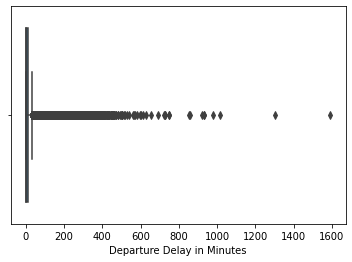

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Departure Delay in Minutes'])
plt.show()

- There are 2 outliers from the visualizations above, which is first about value of 1300 and about 1500

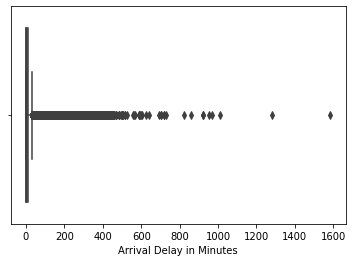

In [44]:
sns.boxplot(x=df['Arrival Delay in Minutes'])
plt.show()

- There are 2 outliers from the visualizations above, which is first about value of 1300 and about 1500. It seems like both of these outliers are actually the same rows.

In [45]:
df.loc[df['Departure Delay in Minutes'] > 1100]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
69661,Male,Loyal Customer,32,Business travel,Business,2916,2,2,2,2,5,5,5,3,4,5,4,5,3,5,1305,1280.0,satisfied
73471,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,3,2,4,2,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


In [46]:
df.loc[df['Arrival Delay in Minutes'] > 1100]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
69661,Male,Loyal Customer,32,Business travel,Business,2916,2,2,2,2,5,5,5,3,4,5,4,5,3,5,1305,1280.0,satisfied
73471,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,3,2,4,2,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


- Since both of these rows has extremely large values than the others. Based on these Visualizations, we also found new outlier (**Departures Delay in Minutes with value of 1305**) that hasn't been found while we describing our datasets. These datapoint are outliers, so we need to drop it to make our visualization better.

In [47]:
df.drop(df[df['Arrival Delay in Minutes'] > 1100].index, inplace=True)

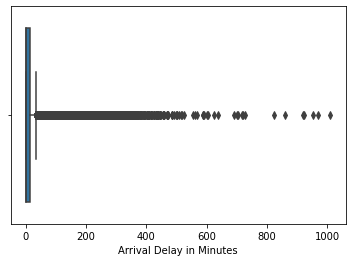

In [48]:
sns.boxplot(x=df['Arrival Delay in Minutes'])
plt.show()

- The boxplot from **Arrival Delay in Minutes** feature seems better since we remove the outliers

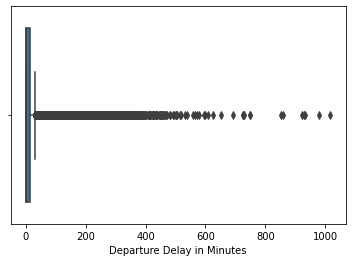

In [49]:
sns.boxplot(x=df['Departure Delay in Minutes'])
plt.show()

- The boxplot from **Departure Delay in Minutes** feature seems better since we remove the outliers

## Correlations



### Encoding Categorical Variables into Numerical Variable for Correlations Purpose

In [50]:
# df['satisfaction'] = pd.get_dummies(df['satisfaction'])
# df['satisfaction']
df['satisfaction'] = df['satisfaction'].apply({'satisfied':1, 'neutral or dissatisfied':0}.get)

- Encoding Target variables for Exploratory Data Analysis Purpose where 0 stands for **neutral/dissatisfied** and 1 stands for **satisfied**

In [51]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,3,5,3,5,5,3,2,5,4,5,5,2,5.0,0
2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,2,3,5,4,5,5,5,5,3,5,5,26,39.0,1
3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,4,5,5,5,3,3,3,3,4,3,5,0,0.0,1
4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,4,4,5,5,5,5,5,3,5,4,0,0.0,1
5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,4,5,4,3,3,4,3,3,3,5,0,1.0,1


### Checking Other Features that have **object** data type

In [52]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

- From the data above, we can conclude that **Gender**, **Customer Type**, **Class**, and **Type of Travel** have object data type.

In [53]:
df['Gender'] = pd.get_dummies(df['Gender'])
df['Customer Type'] = pd.get_dummies(df['Customer Type'])
df['Class'] = pd.get_dummies(df['Class'])
df['Type of Travel'] = pd.get_dummies(df['Type of Travel'])

In [54]:
df.dtypes

Gender                                 uint8
Customer Type                          uint8
Age                                    int64
Type of Travel                         uint8
Class                                  uint8
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

- Now our datapoints' data types are good to go

### Correlation Visualization

In [55]:
corr = df.corr()
corr

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,-0.031558,-0.008930,0.006829,-0.010455,-0.006062,-0.008964,-0.008847,-0.007166,-0.000221,-0.005686,0.042159,0.026666,-0.006064,-0.008019,-0.031835,-0.037333,-0.010415,-0.038937,-0.006417,-0.002632,-0.000467,-0.012337
Customer Type,-0.031558,1.000000,0.281822,-0.308269,0.085520,0.225359,0.007711,0.207015,0.019632,-0.006290,0.059553,0.189471,0.159723,0.110112,0.056369,0.047801,-0.024893,0.032064,-0.023051,0.083757,-0.004738,-0.005150,0.187559
Age,-0.008930,0.281822,1.000000,0.048604,0.139029,0.099848,0.017470,0.038038,0.024462,-0.001562,0.022931,0.208687,0.160315,0.076384,0.057123,0.040502,-0.047619,0.035015,-0.049900,0.053505,-0.010336,-0.012353,0.137051
Type of Travel,0.006829,-0.308269,0.048604,1.000000,0.552022,0.267638,0.104876,-0.259839,0.133396,0.030808,0.063104,0.224625,0.123974,0.147968,0.056473,0.138682,0.031358,-0.017067,0.022488,0.078747,0.006514,0.006136,0.448985
Class,-0.010455,0.085520,0.139029,0.552022,1.000000,0.467181,0.032777,-0.096812,0.107492,0.004515,0.086895,0.330491,0.232969,0.198940,0.220676,0.213399,0.171112,0.162364,0.165850,0.139341,-0.010460,-0.015029,0.503934
Flight Distance,-0.006062,0.225359,0.099848,0.267638,0.467181,1.000000,0.007059,-0.019898,0.065707,0.004745,0.056935,0.215174,0.157501,0.128651,0.109534,0.133822,0.063218,0.073203,0.057440,0.093101,0.001387,-0.002984,0.298903
Inflight wifi service,-0.008964,0.007711,0.017470,0.104876,0.032777,0.007059,1.000000,0.343753,0.715846,0.336125,0.134607,0.457018,0.122619,0.209508,0.121489,0.160496,0.121064,0.043181,0.110621,0.132656,-0.017292,-0.018956,0.284168
Departure/Arrival time convenient,-0.008847,0.207015,0.038038,-0.259839,-0.096812,-0.019898,0.343753,1.000000,0.437017,0.444599,0.005192,0.070003,0.011416,-0.004692,0.068611,0.012473,0.071905,0.093333,0.073220,0.014339,0.001314,-0.000378,-0.051717
Ease of Online booking,-0.007166,0.019632,0.024462,0.133396,0.107492,0.065707,0.715846,0.437017,1.000000,0.458744,0.031943,0.404108,0.030022,0.047178,0.038764,0.107442,0.038855,0.010959,0.035325,0.016194,-0.005982,-0.007703,0.171511
Gate location,-0.000221,-0.006290,-0.001562,0.030808,0.004515,0.004745,0.336125,0.444599,0.458744,1.000000,-0.001160,0.001461,0.003392,0.003562,-0.028529,-0.005859,0.002423,-0.035441,0.001738,-0.004005,0.005857,0.005449,0.000458


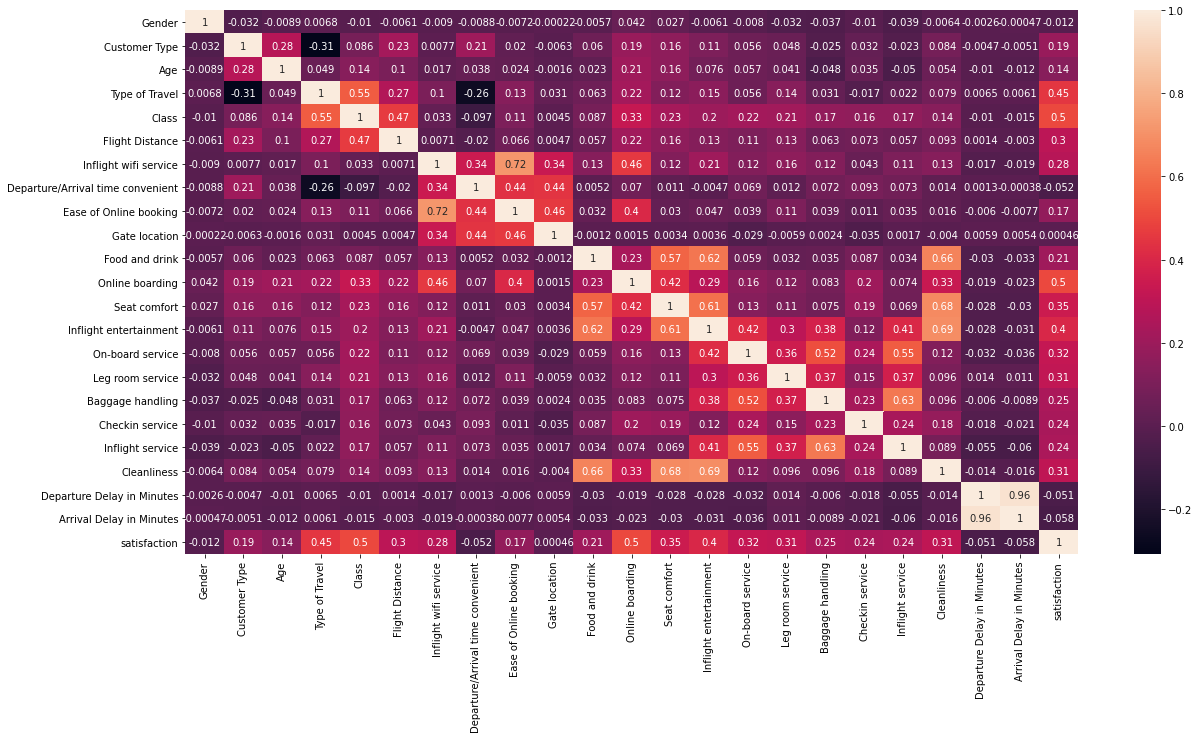

In [56]:
plt.figure(figsize = (20,10))
sns.heatmap(corr,annot=True)
plt.show()

- From the heatmap above, we can see a lot of features that correlate with target variable (**satisfaction**), for example, **Online Boarding**, **Type of Travel**, **Class**, **Inflight Entertainment**, **Seat Comfort**. 

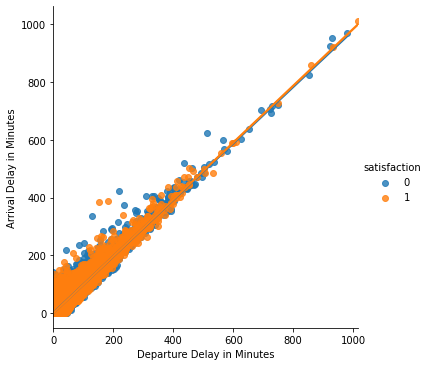

In [57]:
sns.lmplot(x='Departure Delay in Minutes', y = 'Arrival Delay in Minutes', hue='satisfaction', data=df)
plt.show()

- From the plot above, we can see that **Departure Delay in Minutes** and **Arrival Delay in Minutes** has a strong correlations. This does make sense since in real case, people who tends late on depature most likely also late on arriving. 
- The plot also tell us about the satisfaction, both satisfaction are in the same range, from this plot, we hardly see if these features have strong correlation with **satisfaction** because people are satisfied also neutral/dissatisfied by looking at this plot. This plot also proves the correlation matrix which showed that both of these features have low correlation with target variable

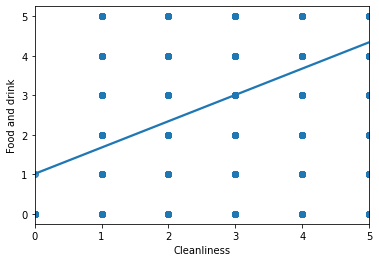

In [62]:
sns.regplot(x='Cleanliness', y='Food and drink', data=df)
plt.show()

- From the plot above, it tell us that **Cleanliness** have a positive correlation with **Food and drink**. This does make sense since people want a food and drink while flying in airline but also want to keep cleanliness so that they can feel comfortable while eating and drinking
- For some reason, the plot looks like that because of these features actually a *rating* system (0 - 5), so that's why it looks like having *gap*, but overall, the plot shows some proof to our correlation matrix

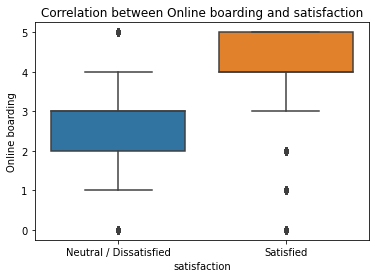

In [140]:
sns.boxplot(x='satisfaction',y='Online boarding', data=df)
position = (1,0)
label = ("Satisfied","Neutral / Dissatisfied")
plt.xticks(position,label)
plt.title("Correlation between Online boarding and satisfaction")
plt.show()

- People who are having a good online boarding experience tends to be more satisfied than people who have decent online boarding experience. The plot also related to real world case since people will be more satisfied if they get better experience in online boarding.

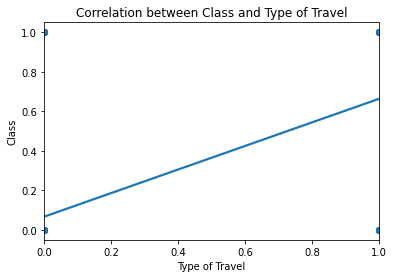

In [141]:
sns.regplot(x='Type of Travel',y='Class',data=df)
plt.title("Correlation between Class and Type of Travel")
plt.show()

- **Type of Travel** and **Class** have a good positive correlation based on the plot, we hardly see the scatterplot since these datas are categorical variable. However, this plot is also related to real life case, people that have **Business** class more likely have a type of travel: **Business Travel** .

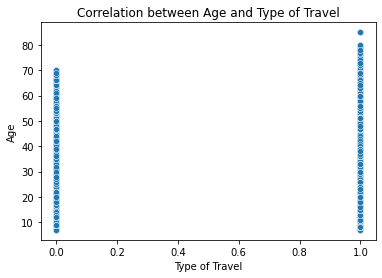

In [142]:
sns.scatterplot(y=df['Age'],x=df['Type of Travel'])
plt.title("Correlation between Age and Type of Travel")
plt.show()

- From the graph above, it seems like both type of travel (Economy and Business) have the same range age of people. However, people that have age more than 70 tends to have a **Business Travel**, this is possible since people that have that range of age need more comfortable place which we normally found in **Business Travel**.

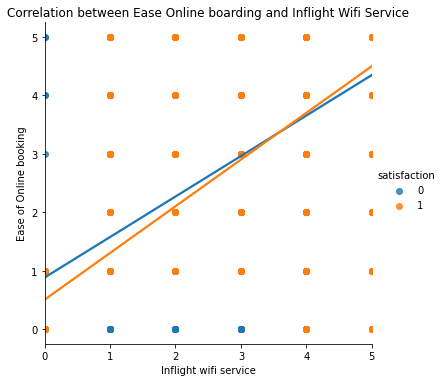

In [143]:
sns.lmplot(x='Inflight wifi service', y='Ease of Online booking',hue='satisfaction', data = df)
plt.title("Correlation between Ease Online boarding and Inflight Wifi Service")
plt.show()

- The plot shows that the increasing **Inflight wifi service** affects the increasing **Ease of Online Booking**. This is make sense because people that have good experience on wifi service will getting more ease on booking the schedule online. That is also why the satisfaction also increasing with the increasing of the wifi service.

In [122]:
def rating_count(data):
  df_bg = pd.DataFrame({
      'Rating Sum': [(df[data] == 5).sum(),(df[data] == 4).sum(),(df[data] == 3).sum(),
      (df[data] == 2).sum(),(df[data] == 1).sum()]
  },index=[5,4,3,2,1])
  return df_bg

In [124]:
df_baggage = rating_count('Baggage handling')
df_baggage

,Rating Sum
5,27047
4,37272
3,20567
2,11483
1,7223


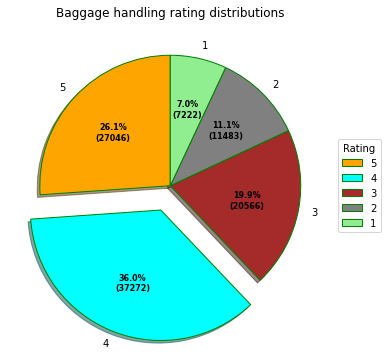

In [127]:
explode = (0.0, 0.2, 0.0, 0.0, 0.0)

colors = ( "orange", "cyan", "brown",
          "grey", "lightgreen", "beige")
  
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
  
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
  
fig, ax = plt.subplots(figsize =(12, 6))
wedges, texts, autotexts = ax.pie(df_baggage['Rating Sum'], 
                                  autopct = lambda pct: func(pct, df_baggage['Rating Sum']),
                                  explode = explode, 
                                  labels = df_baggage.index,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

ax.legend(wedges, df_baggage.index,
          title ="Rating",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Baggage handling rating distributions")
plt.show()

- From the pie chart above, we can see that most of passenger experience good baggage handling service since the chart shows most rating lies in rating 4 and 5.

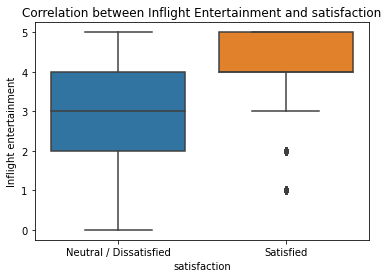

In [147]:
sns.boxplot(x='satisfaction',y='Inflight entertainment', data=df)
position = (1,0)
label = ("Satisfied","Neutral / Dissatisfied")
plt.xticks(position,label)
plt.title("Correlation between Inflight Entertainment and satisfaction")
plt.show()

- From the plot above, we can see that some people feel satisfied if they get better inflight entertainment. However, people will feel neutral/dissatisfied if they get lesser inflight entertainment. This does make sense since people will feel bored while inflight, better entertainment will satisfy the passenger. We also see that some of people also feel satisfied even thought they get lesser inflight entertainment. This is also possible since maybe passenger fell asleep or doing other work during flight so they don't really need entertainment.

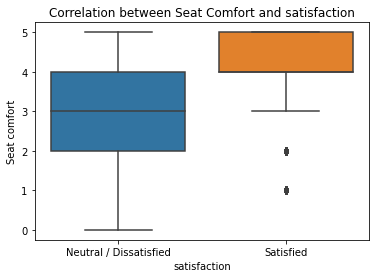

In [146]:
sns.boxplot(x='satisfaction',y='Seat comfort', data=df)
position = (1,0)
label = ("Satisfied","Neutral / Dissatisfied")
plt.xticks(position,label)
plt.title("Correlation between Seat Comfort and satisfaction")
plt.show()

- **Seat Comfort** plot also shows us that people will more satisfied if they get more comfortable seat. However, some of people doesn't bother if they get less **Seat Comfort**. This thing is possible since **Comfortable** is relatively different for each person

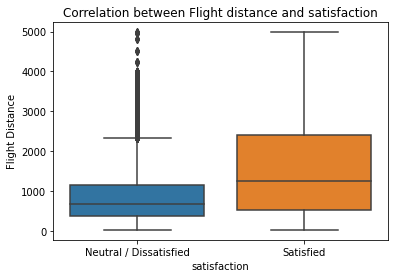

In [150]:
sns.boxplot(x='satisfaction',y='Flight Distance', data=df)
position = (1,0)
label = ("Satisfied","Neutral / Dissatisfied")
plt.xticks(position,label)
plt.title("Correlation between Flight distance and satisfaction")
plt.show()

- From the plot above, we can see that most passenger that travels more than approximately more than 1300 will feel more satisfied. But, since the **Neutral/Dissatisfied** Distributions a little bit scattered, it also means that there are also a lot of people that don't feel satisfied enought while travel in further distance 